# Churn prediction with Machine Learning in R

In [ ]:
## install packages
#install.packages("caret") ## installed in Environment
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
## load library
library(caret)
library(tidyverse)
library(reshape2)
library(ggplot2)

In [ ]:
## import CSV file as dataset
churn <- read_csv("/data/notebook_files/churn.csv")

Rows: 5000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): churn, internationalplan, voicemailplan
dbl (15): accountlength, numbervmailmessages, totaldayminutes, totaldaycalls...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## EDA 

In [ ]:
## preview data
head(churn, 10)

churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
No,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
No,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
No,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
No,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1


In [ ]:
## checking data types
str(churn)

spc_tbl_ [5,000 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ churn                     : chr [1:5000] "No" "No" "No" "No" ...
 $ accountlength             : num [1:5000] 128 107 137 84 75 118 121 147 117 141 ...
 $ internationalplan         : chr [1:5000] "no" "no" "no" "yes" ...
 $ voicemailplan             : chr [1:5000] "yes" "yes" "no" "no" ...
 $ numbervmailmessages       : num [1:5000] 25 26 0 0 0 0 24 0 0 37 ...
 $ totaldayminutes           : num [1:5000] 265 162 243 299 167 ...
 $ totaldaycalls             : num [1:5000] 110 123 114 71 113 98 88 79 97 84 ...
 $ totaldaycharge            : num [1:5000] 45.1 27.5 41.4 50.9 28.3 ...
 $ totaleveminutes           : num [1:5000] 197.4 195.5 121.2 61.9 148.3 ...
 $ totalevecalls             : num [1:5000] 99 103 110 88 122 101 108 94 80 111 ...
 $ totalevecharge            : num [1:5000] 16.78 16.62 10.3 5.26 12.61 ...
 $ totalnightminutes         : num [1:5000] 245 254 163 197 187 ...
 $ totalnightcalls           : num [1:5000] 9

In [ ]:
## checking missing values
sum(is_null(churn))

0

In [ ]:
## checking duplicate
sum(is_double(churn))

0

In [ ]:
## descriptive statistic check
summary(churn)

churn accountlength internationalplan voicemailplan 
 Length:5000 Min. : 1.0 Length:5000 Length:5000 
 Class :character 1st Qu.: 73.0 Class :character Class :character 
 Mode :character Median :100.0 Mode :character Mode :character 
 Mean :100.3 
 3rd Qu.:127.0 
 Max. :243.0 
 numbervmailmessages totaldayminutes totaldaycalls totaldaycharge 
 Min. : 0.000 Min. : 0.0 Min. : 0 Min. : 0.00 
 1st Qu.: 0.000 1st Qu.:143.7 1st Qu.: 87 1st Qu.:24.43 
 Median : 0.000 Median :180.1 Median :100 Median :30.62 
 Mean : 7.755 Mean :180.3 Mean :100 Mean :30.65 
 3rd Qu.:17.000 3rd Qu.:216.2 3rd Qu.:113 3rd Qu.:36.75 
 Max. :52.000 Max. :351.5 Max. :165 Max. :59.76 
 totaleveminutes totalevecalls totalevecharge totalnightminutes
 Min. : 0.0 Min. : 0.0 Min. : 0.00 Min. : 0.0 
 1st Qu.:166.4 1st Qu.: 87.0 1st Qu.:14.14 1st Qu.:166.9 
 Median :201.0 Median :100.0 Median :17.09 Median :200.4 
 Mean :200.6 Mean :100.2 Mean :17.05 Mean :200.4 
 3rd Qu.:234.1 3rd Qu.:114.0 3rd Qu.:19.90 3rd Qu.:234.7 
 Max. :363.7 Max. :170.0 Max. :30.91 Max. :395.0 
 totalnightcalls totalnightcharge totalintlminutes totalintlcalls 
 Min. : 0.00 Min. : 0.000 Min. : 0.00 Min. : 0.000 
 1st Qu.: 87.00 1st Qu.: 7.510 1st Qu.: 8.50 1st Qu.: 3.000 
 Median :100.00 Median : 9.020 Median :10.30 Median : 4.000 
 Mean : 99.92 Mean : 9.018 Mean :10.26 Mean : 4.435 
 3rd Qu.:113.00 3rd Qu.:10.560 3rd Qu.:12.00 3rd Qu.: 6.000 
 Max. :175.00 Max. :17.770 Max. :20.00 Max. :20.000 
 totalintlcharge numbercustomerservicecalls
 Min. :0.000 Min. :0.00 
 1st Qu.:2.300 1st Qu.:1.00 
 Median :2.780 Median :1.00 
 Mean :2.771 Mean :1.57 
 3rd Qu.:3.240 3rd Qu.:2.00 
 Max. :5.400 Max. :9.00

**This data has some outliers.**

In [ ]:
## encoding for label columns
churn$churn <- as.numeric(churn$churn == "Yes")
churn$internationalplan <- as.numeric(churn$internationalplan == "yes")
churn$voicemailplan <- as.numeric(churn$voicemailplan == "yes")

In [ ]:
## impute the outlying values for these columns. 
## Calculate the 95th percentile of each column and 
## change to this value any value in the column that exceeds it.

columns_to_transform <- c('accountlength', 'internationalplan', 'voicemailplan',
                          'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
                          'totaldaycharge', 'totaleveminutes', 'totalevecalls',
                          'totalevecharge', 'totalnightminutes', 'totalnightcalls',
                          'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
                          'totalintlcharge', 'numbercustomerservicecalls')

for (column in columns_to_transform) {
  threshold <- quantile(churn[[column]], 0.95)
  churn[[column]] <- ifelse(churn[[column]] > threshold, threshold, churn[[column]])
}

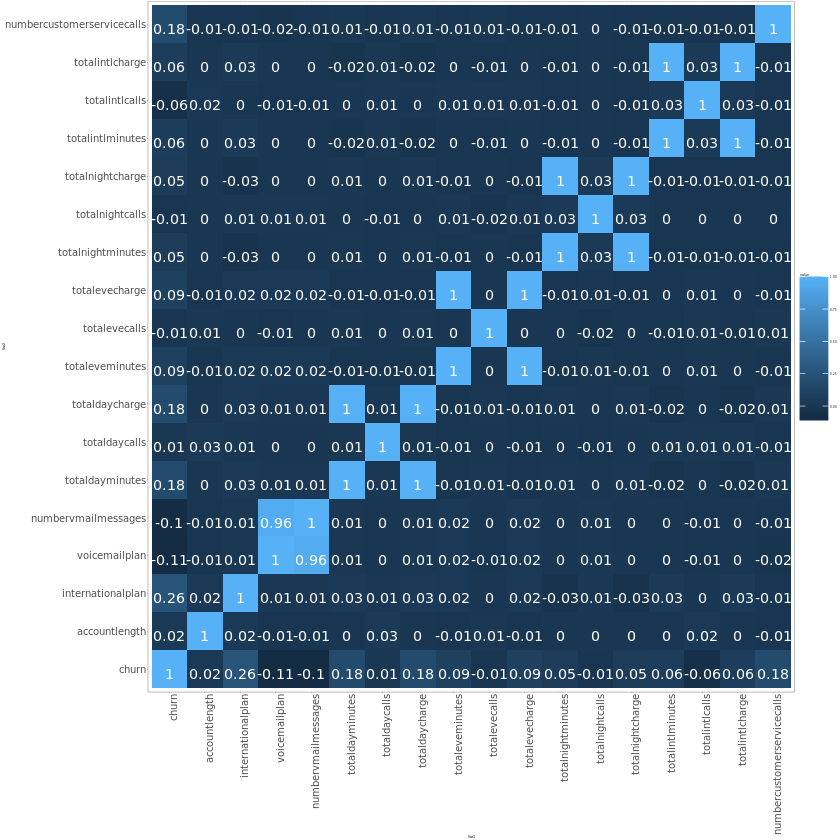

In [ ]:
## create correlation heat map 
cormat <- round(cor(churn, method = "pearson"),2)

melted_cormat <- melt(cormat)

theme_set(theme_bw(base_size = 2))
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() + geom_text(aes(x=Var1, y=Var2, label=value), vjust=1, size = 3, color = "white") +
  theme(axis.text.x = element_text(angle=90, hjust=1, size = 6), axis.text.y = element_text(size = 6))

**choosing features for the most correlation value**
- internationalplan
- voicemailplan
- totaldaycharge 
- numbercustomerservicecalls

## **Machine Learning process**

In [ ]:
## change label to factor
churn$churn <- as.factor(churn$churn)

n <- nrow(churn)

In [ ]:
## create split data function
train_test_split <- function(data) {
  set.seed(42)
  n <- nrow(data)
  train_id <- sample(1:n, 0.8*n)
  train_df <- data[train_id, ]
  test_df <- data[-train_id, ]
  return( list(train_df, test_df))
}

In [ ]:
## prepare data for train and test df
prep_df <- train_test_split(churn)

In [ ]:
## train model
### cv stands for K-Fold CV
ctrl <- trainControl(method = "cv",
                     number = 5)

### set method "glm" (Generalized Linear Model) for classifacation 
model <- train(churn ~ internationalplan + voicemailplan
               + totaldaycharge + numbercustomerservicecalls,
               data = prep_df[[1]],
               method = "glm",
               trControl = ctrl)

In [ ]:
## score model
pred_churn <- predict(model, newdata = prep_df[[2]])

In [ ]:
##evaluate model
### use confusionMatrix for classifacation evaluate
conf <- confusionMatrix(pred_churn, prep_df[[2]]$churn)

In [ ]:
print(model)
print(conf)

Generalized Linear Model 

4000 samples
   4 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3200, 3199, 3200, 3200, 3201 
Resampling results:

  Accuracy   Kappa    
  0.8589999  0.1446207

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 832 122
         1  23  23
                                          
               Accuracy : 0.855           
                 95% CI : (0.8316, 0.8763)
    No Information Rate : 0.855           
    P-Value [Acc > NIR] : 0.5221          
                                          
                  Kappa : 0.1838          
                                          
 Mcnemar's Test P-Value : 4.003e-16       
                                          
            Sensitivity : 0.9731          
            Specificity : 0.1586          
         Pos Pred Value : 0.8721          
         Neg Pred Value : 0.5000          
             Prevalence : 0.8

## **Summary**
For  &emsp; **Train model**  accuracy is    **0.8589999** \
and for **Test model**   accuracy  is **0.855**